In [ ]:
import numpy as np

a = np.random.rand(3,3)

In [6]:
print(np.argmax(a))
print(np.argmin(a))

0
11


In [5]:
import numpy as np

a= np.zeros((10,10), dtype =int)
a[0,:]=1
a[:,9]=1
a[:,0]=1
a[9,:]=1
print(a)


[[1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1]]


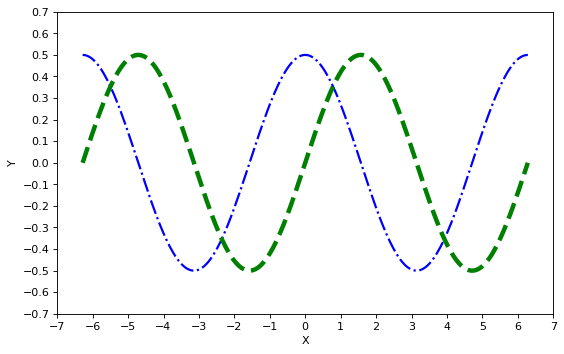

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,5),dpi=80) # 创建绘图图形对象figure，参数figsize决定尺寸，dpi为分辨率

X = np.linspace(-np.pi*2, np.pi*2, 256, endpoint=True) #创建等差一维数组
C = np.cos(X)/2 # C == cos函数 y轴上的值
S = np.sin(X)/2 # S == sin函数 y轴上的值

plt.plot(X, C, color='b',linewidth=2.0,linestyle="-.") # plot方法绘点制图
plt.plot(X, S, color='g',linewidth=4.0,linestyle="--") # X、Y轴数据是前面两个参数，后面的参数可以设置曲线各种属性
# linewidth 为 线宽    linestyle 为 指定线型

plt.xlabel("X") # X轴标题名字
plt.ylabel("Y")
plt.xlim(-6.0,6.0) #设置 x轴的上下限为6
plt.xticks(np.linspace(-7,7,15,endpoint=True)) #设置x轴上标点距离，用等差方法
plt.ylim(-0.7,0.7)
plt.yticks(np.linspace(-0.7,0.7,15,endpoint=True))

plt.show()

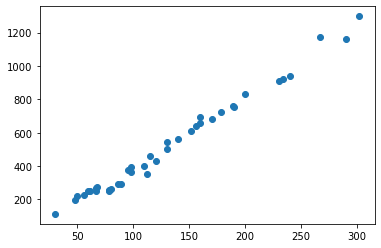

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

pr = pd.read_csv('price.csv')
'''
CSV文件是个纯文本文件
每行相当于一条记录
是用“，”分割字段的纯文本数据库文件

'''
plt.scatter(pr['Area'], pr['Price'])
plt.show()

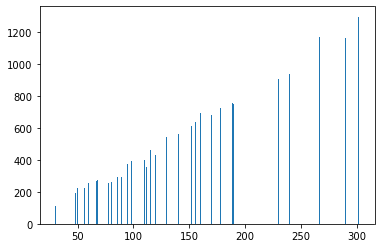

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pr = pd.read_csv("price.csv")
plt.bar(pr['Area'], pr['Price'])
plt.show()

In [1]:
import numpy as np
import pandas as pd
import random

a=[]
b=[]
c=[]
d=[]
e=[]
for i in range(1,6):
    a.append(int(random.randint(1,101)))
    b.append(int(random.randint(1,101)))
    c.append(int(random.randint(1,101)))
    d.append(int(random.randint(1,101)))
    e.append(int(random.randint(1,101)))
df = pd.DataFrame(data=[a,b,c,d,e],
            columns = ['a','b','c','d','e'],
            index=[1,2,3,4,5])
df.loc['sum']=df.apply(lambda x:x.sum())
# 获得 sum 行
dfs = df.loc['sum']
# 获得 sum 中最小值的索引，可能有多个
dfs_argmax = dfs[dfs == dfs.min()].index
# randomly choose 1 index
dfs_argmax = np.random.choice(dfs_argmax)

print(df)
print(dfs.min())
print(dfs_argmax)

       a    b    c    d    e
1      1    5    3   10    5
2     97   11   63   61   54
3     17   81   84   81   98
4     34   36   59   74   32
5     79   39   23   81   35
sum  228  172  232  307  224
172
b


In [1]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
tf.compat.v1.disable_v2_behavior()
import numpy as np
    #引入input_mnist
from tensorflow.core.example.tutorials.mnist import input_data
    #加载mnist信息,获得训练和测试图片以及对应标签
mnist = input_data.read_data_sets('/mnist_data',one_hot = True)
trainimg = mnist.train.images
trainlabel = mnist.train.labels
testimg = mnist.test.images
testlabel = mnist.test.labels
print("MNIST LOAD READY")
#输入图片尺寸28*28
n_input = 784
#输出类别数
n_output = 10
#初始化权重
weights = {
        #卷积层参数，采用高斯初始化
        'wc1':tf.Variable(tf.random.normal([3,3,1,64],stddev = 0.1)),
        'wc2':tf.Variable(tf.random.normal([3,3,64,128],stddev=0.1)),
        #全连接层参数
        'wd1':tf.Variable(tf.random.normal([7*7*128,1024],stddev=0.1)),       
        'wd2':tf.Variable(tf.random.normal([1024,n_output],stddev=0.1))        
        }
#初始化偏置
biases = {
        'bc1':tf.Variable(tf.random.normal([64],stddev = 0.1)),
        'bc2':tf.Variable(tf.random.normal([128],stddev=0.1)),
        'bd1':tf.Variable(tf.random.normal([1024],stddev=0.1)),       
        'bd2':tf.Variable(tf.random.normal([n_output],stddev=0.1))        
        }
#定义前向传播函数
def conv_basic(_input,_w,_b,_keepratio):
    #输入
    #reshape()中的-1表示不用我们指定，让函数自己计算
    _input_r = tf.reshape(_input,shape = [-1,28,28,1])
    #CONV1
    _conv1 = tf.nn.conv2d(_input_r,_w['wc1'],strides=[1,1,1,1],padding='SAME')
    _conv1 = tf.nn.relu(tf.nn.bias_add(_conv1,_b['bc1']))
    _pool1 = tf.nn.max_pool(_conv1,ksize = [1,2,2,1],strides = [1,2,2,1],padding='SAME')
    #Dropout层既可以使用在全连接层之后，也可以使用在每层之后，这里在每层之后都加了Dropout
    _pool_dr1 = tf.nn.dropout(_pool1,_keepratio)
    #CONV2
    #conv2d计算二维卷积
    _conv2 = tf.nn.conv2d(_pool_dr1,_w['wc2'],strides=[1,1,1,1],padding='SAME')
    _conv2 = tf.nn.relu(tf.nn.bias_add(_conv2,_b['bc2']))
    _pool2 = tf.nn.max_pool(_conv2,ksize = [1,2,2,1],strides = [1,2,2,1],padding='SAME')
    _pool_dr2 = tf.nn.dropout(_pool2,_keepratio)
    #向量化 全连接层输入 得到wd1层的7*7*128的shape 然后转化为向量
    _dense1 = tf.reshape(_pool_dr2,[-1,_w['wd1'].get_shape().as_list()[0]])
    #FULL CONNECTION1
    _fc1 = tf.nn.relu(tf.add(tf.matmul(_dense1,_w['wd1']),_b['bd1']))
    _fc_dr1 = tf.nn.dropout(_fc1,_keepratio)
    #FULL CONNECTION2
    _out = tf.add(tf.matmul(_fc_dr1,_w['wd2']),_b['bd2'])
    #输出字典
    out = {'input_r':_input_r,'conv1':_conv1,'pool1':_pool1,'pool1_dr1':_pool_dr1,
            'conv2':_conv2,'pool2':_pool2,'pool_dr2':_pool_dr2,'dense1':_dense1,
            'fc1':_fc1,'fc_dr1':_fc_dr1,'out':_out
            }
    return out
print("CNN READY")
a = tf.Variable(tf.random.normal([3,3,1,64],stddev=0.1))
print(a)
a = tf.print(a,[a],"a: ")
init = tf.compat.v1.global_variables_initializer()
sess = tf.compat.v1.Session()
sess.run(init)
#填充
x = tf.compat.v1.placeholder(tf.float32,[None,n_input])
y = tf.compat.v1.placeholder(tf.float32,[None,n_output])
keepratio = tf.compat.v1.placeholder(tf.float32)
#进行一次前向传播
_pred = conv_basic(x,weights,biases,keepratio)['out']
#计算损失
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = _pred,labels=y))
#定义优化器
optm = tf.compat.v1.train.AdamOptimizer(learning_rate = 0.001).minimize(cost)
#比较预测的标签和真实标签是否一致，一致返回True，不一致返回False
#argmax找到给定的张量tensor中在指定轴axis上的最大值/最小值的位置，0为每一列，1为每一行
_corr = tf.equal(tf.argmax(_pred,1),tf.argmax(y,1))
#True转化为1 False为0
accr = tf.reduce_mean(tf.cast(_corr,tf.float32)) 
#每1个epoch保存一次
save_step = 1
#max_to_keep最终只保留三组模型，即(12 13 14)
saver = tf.compat.v1.train.Saver(max_to_keep=3)
#控制训练还是测试
do_train=1
init = tf.compat.v1.global_variables_initializer()  
sess = tf.compat.v1.Session()
sess.run(init)      
#训练15个epoch
training_epochs = 15
batch_size = 16
display_step = 1
#训练过程
if do_train == 1:
    for epoch in range(training_epochs):
        avg_cost=0.
        total_batch = 10
        #迭代优化
        for i in range(total_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)       
            sess.run(optm,feed_dict = {x:batch_xs,y:batch_ys,keepratio:0.7})     
            avg_cost += sess.run(cost,feed_dict={x:batch_xs,y:batch_ys,keepratio:1.})/total_batch
        #打印信息
        if (epoch+1) % display_step ==0:
            print("Epoch:%03d/%03d cost:%.9f"%(epoch,training_epochs,avg_cost))
            train_acc = sess.run(accr,feed_dict = {x:batch_xs,y:batch_ys,keepratio:1.})
            print("Train accuracy:%.3f"%(train_acc))
        #保存模型
        if epoch % save_step == 0:
            saver.save(sess,"testRe/model.ckpt-"+str(epoch))
#测试
if do_train == 0:
    #epoch = 15 减1之后即加载第14个模型
    epoch = training_epochs-1
    #读取模型
    saver.restore(sess,"testRe/model.ckpt-"+str(epoch))
    #打印测试精度
    test_acc = sess.run(accr,feed_dict={x:testimg,y:testlabel,keepratio:1.})
    print("test accr is:%.3f"%(test_acc))
print("Optimization Finished")


Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Please use alternatives such as: tensorflow_datasets.load('mnist')
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /mnist_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /mnist_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /mnist_data\t10k-images-idx3-ubyte.gz
Extracting /mnist_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/_DataSet.py from tensorflow/models.
MNIST LOAD READY
CNN READY
<tf.Variable 'Variable_8:0' shape=(3, 3, 1, 64) dtype=float32>
Epoch:000/015 cost:nan
Train accuracy:0.188
Epoch:001/015 cost:nan
Train accuracy:0.125
Epoch:002/015 cost:nan
Train accuracy:0.062
Epoc

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
for moudle in mpl,np,pd,sklearn,tf,keras:
    print(moudle.__name__,moudle.__version__)
fashion_mnist=keras.datasets.fashion_mnist#导入数据
(x_train_all,y_train_all),(x_test,y_test)=fashion_mnist.load_data()#拆分训练集和测试集
x_valid,x_train=x_train_all[:5000],x_train_all[5000:]#进一步拆分为训练集和验证集
y_valid,y_train=x_train_all[:5000],y_train_all[5000:]
print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
#数据归一化
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_valid_scaled=scaler.transform(x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test_scaled=scaler.transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

def show_single_image(img_arr):#显示单张图片
    plt.imshow(img_arr,cmap="binary")#二值化显示
    plt.show()
show_single_image(x_train[0])
def show_imgs(n_rows,n_cols,x_data,y_data,class_names):
    assert len(x_data)==len(y_data)
    assert n_rows*n_cols<len(x_data)
    plt.figure(figsize=(n_cols*1.4,n_rows*1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index=n_cols*row+col#计算当前位置
            plt.subplot(n_rows,n_cols,index+1)#画子图,将多个图像画到一个界面上
            plt.imshow(x_data[index],cmap="binary",
                        interpolation='nearest')#显示每个图片,并进行插值操作
            plt.axis('off')#关掉坐标系
            plt.title(class_names[y_data[index]])#加上标题
        plt.show()
        
class_names=['T-shirt','Trousers','Pullover','Dress','Coat','Sandal','Shirt',
            'Sneaker','Bag','Ankle boot']
show_imgs(3,5,x_train,y_train,class_names)
model=keras.models.Sequential()
#将图片展开，将28*28的矩阵展平为28*28的一维向量
model.add(keras.layers.Flatten(input_shape=[28,28]))
#全链接层，神经网络的一种，以层次来发掘神经网络，下层单元与上层单元一一链接
model.add(keras.layers.Dense(300,activation="relu"))#添加两个,relu:y=max(0,x)
model.add(keras.layers.Dense(100,activation="relu"))
#控制输出，长度为10的向量。
#softmax将向量变成概率分布,x=[x1,x2,x3]
#softmax运算:y=[e^x1/sum,e^x2/sum,e^x3/sum],(sum=e^x1+e^x2+e^x3)
model.add(keras.layers.Dense(10,activation="softmax"))
#将损失函数和优化方法加到图中去。
#y为长度等于样本数量的向量，故y为一个值，所以用sparse_categorical_crossentropy
model.compile(loss="sparse_categorical_crossentropy",
            optimizer="sgd",metrics=["accuracy"])
history=model.fit(x_train_scaled,y_train,epochs=10,validation_data=(x_test_scaled,y_test))
test_loss, test_acc = model.evaluate(x_test_scaled, y_test)#查看测试准确率
print('\nTest accuracy:', test_acc)
def plot_learning_curves(history):
    
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
plot_learning_curves(history)